In [5]:
path = 'B365-HW6.csv'

In [6]:
import pandas as pd


In [16]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt

In [225]:
df = pd.read_csv(path)

# 1

In [266]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.info()

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       150 non-null    float64
 1   B       150 non-null    float64
 2   C       150 non-null    float64
 3   D       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [238]:
df_class = df['class']

In [283]:
colors= ["red", "yellow", "green","orange"]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)

In [270]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

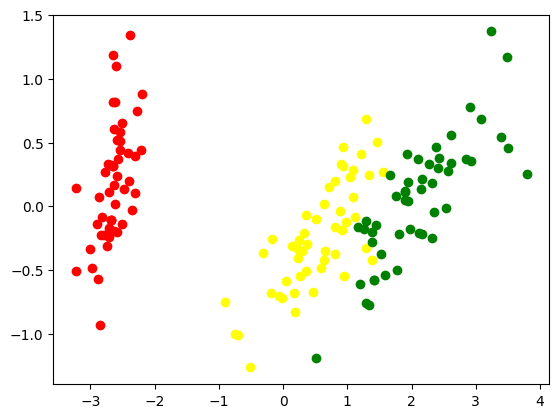

In [289]:
data_pca = pca.transform(df)
data_pca = pd.DataFrame(data_pca)
for points, p_class in zip(zip(data_pca[0],data_pca[1]), df_class):
    x ,y =points
    plt.scatter(x,y, c=colors[p_class])

In [271]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

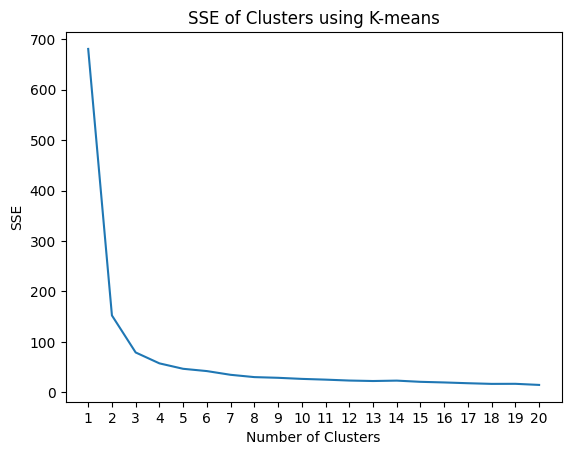

In [406]:
sse = []
k_list = [i for i in range(1,21)]
sse = []

sse = []
for k in range(1,21):
    kmeans = KMeans(n_clusters=k, init ='k-means++', n_init='auto').fit(df)        
    #auto always uses 10 at init random
    sse.append(kmeans.inertia_)
plt.plot(k_list,sse)

plt.xticks(k_list)
plt.xlabel('Number of Clusters')
plt.ylabel("SSE")
plt.title("SSE of Clusters using K-means")
plt.show()


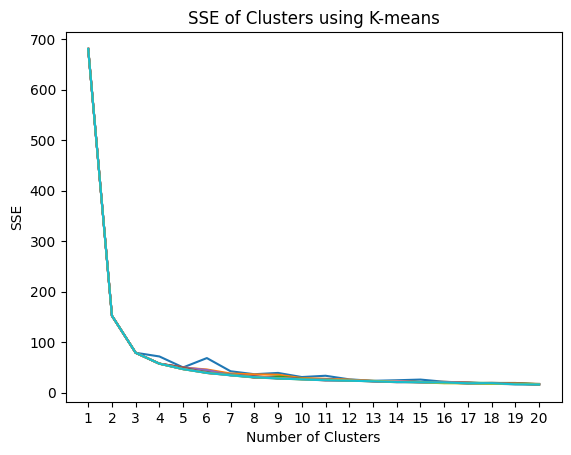

In [298]:
sse = []
k_list = [i for i in range(1,21)]
sse = []
for i in range(10):
    sse = []
    for k in range(1,21):
        kmeans = KMeans(n_clusters=k, init ='random', n_init=i+1).fit(df)        
        #auto always uses 10 at init random
        sse.append(kmeans.inertia_)
    plt.plot(k_list,sse)
plt.xticks(k_list)
plt.xlabel('Number of Clusters')
plt.ylabel("SSE")
plt.title("SSE of Clusters using K-means")
plt.show()


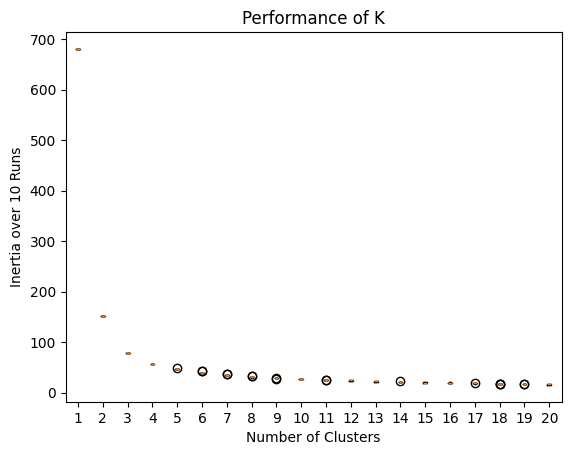

<Figure size 640x480 with 0 Axes>

In [451]:
sse = []
k_list = [i for i in range(1,21)]
sse = []
 

    
for k in range(1,21):
    sse = []
    for i in range(10):
        kmeans = KMeans(n_clusters=k, init ='random', n_init='auto').fit(df)        
        #auto always uses 10 at init random
        sse.append(kmeans.inertia_)
    # print(set(sse))
    plt.boxplot(
        sse,
        positions=[k],
        label=[k])
#plt.xticks(k_list)
plt.xlabel('Number of Clusters')
plt.ylabel("Inertia over 10 Runs")
plt.title("Performance of K")
plt.show()
plt.savefig('kmeans_boxplot.png', dpi=300, bbox_inches='tight') 


In [402]:
cluster.children_[1]

array([29, 30])

In [403]:
cluster.labels_

array([123,  91, 145,  83, 115, 104, 137,  90, 121, 131, 141, 133, 118,
        77, 122,  97, 124,  61, 114,  81, 126, 105, 147, 132, 139, 134,
        89, 149, 108, 148,  84,  78, 140, 125,  69,  66,  79, 120,  93,
       143, 142, 103, 117,  65, 130,  87, 106, 116, 128, 146, 113, 127,
        88,  99,  52,  43,  82, 138,  95, 102, 107, 100,  76,  96,  80,
        39, 109, 110,  49,  40,  98,  86,  63,  94,  70, 112, 136,  85,
        47,  60,  73, 129,  92, 144,  54, 101,  50,  74,  42, 135,  34,
        53,  64,  48, 119,  72,  51,  41,  45, 111,  44,  59,  19,  31,
        26,  57,  38,  25,  32,  71,  29,  12,  20,  62,   9,  58,  23,
        46,  56,  36,  21,  75,  67,  30,  55,  35,  17,  24,  37,  15,
        68,  33,  18,  28,  27,  11,  13,   5,   8,  16,  22,  10,   7,
         3,  14,   4,   6,   1,   2,   0])

## 2

In [300]:
from sklearn.cluster import AgglomerativeClustering
n_clusters =5
cluster_complete = AgglomerativeClustering(distance_threshold=0,n_clusters=None, linkage="complete")
cluster_complete.fit(df)
cluster_avg = AgglomerativeClustering(distance_threshold=0,n_clusters=None, linkage="average")
cluster_avg.fit(df)

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

In [158]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

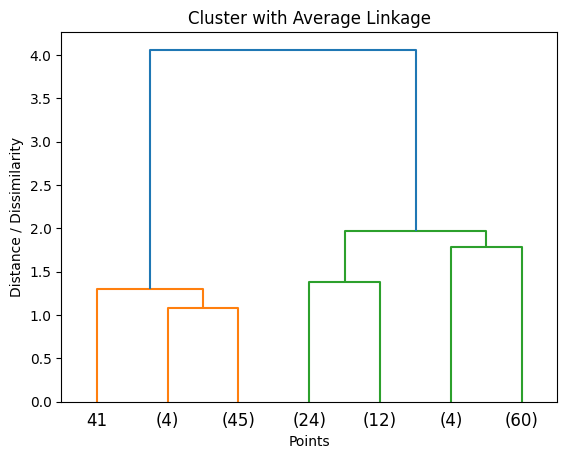

In [419]:
plot_dendrogram(cluster_avg, truncate_mode='level', p=2)
plt.ylabel("Distance / Dissimilarity")
plt.xlabel("Points")
plt.title("Cluster with Average Linkage")
plt.savefig('avg_linkage.png', dpi=300, bbox_inches='tight') 

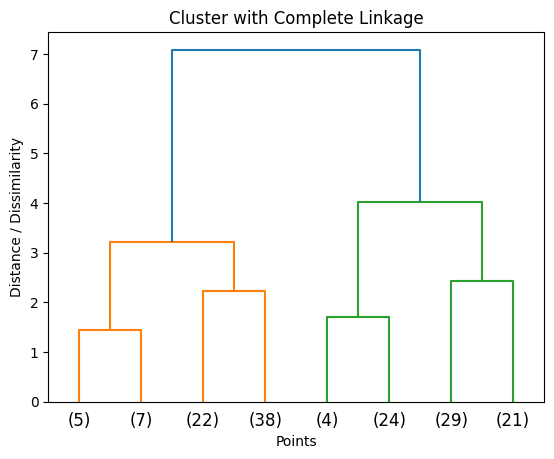

In [420]:
plot_dendrogram(cluster_complete, truncate_mode='level', p=2)
plt.ylabel("Distance / Dissimilarity")
plt.xlabel("Points")
plt.title("Cluster with Complete Linkage")
plt.savefig('com_linkage.png', dpi=300, bbox_inches='tight') 

In [166]:
from scipy.cluster.hierarchy import dendrogram

# DBSCAN

In [187]:
from sklearn.cluster import DBSCAN
from scipy.spatial import distance

In [239]:
df.shape

(150, 5)

In [241]:
df.drop(columns=['class'], inplace=True)

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       150 non-null    float64
 1   B       150 non-null    float64
 2   C       150 non-null    float64
 3   D       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [258]:
from scipy.spatial.distance import cdist

In [305]:
distance_matrix = df.to_numpy()
distance_matrix = cdist(distance_matrix,distance_matrix)

In [306]:
distance_df = pd.DataFrame(distance_matrix)
distance_df

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.000000,0.538516,0.509902,0.648074,0.141421,0.616441,0.519615,0.173205,0.921954,0.469042,...,5.019960,4.636809,4.208325,5.257376,5.136146,4.654031,4.276681,4.459821,4.650806,4.140048
1,0.538516,0.000000,0.300000,0.331662,0.608276,1.090871,0.509902,0.424264,0.509902,0.173205,...,5.072475,4.702127,4.180909,5.320714,5.206726,4.700000,4.249706,4.498889,4.718050,4.153312
2,0.509902,0.300000,0.000000,0.244949,0.509902,1.086278,0.264575,0.412311,0.435890,0.316228,...,5.228767,4.868265,4.334743,5.475400,5.353504,4.864155,4.430576,4.661545,4.848711,4.298837
3,0.648074,0.331662,0.244949,0.000000,0.648074,1.166190,0.331662,0.500000,0.300000,0.316228,...,5.104900,4.760252,4.177320,5.349766,5.232590,4.745524,4.288356,4.533211,4.719110,4.149699
4,0.141421,0.608276,0.509902,0.648074,0.000000,0.616441,0.458258,0.223607,0.921954,0.529150,...,5.061620,4.686150,4.246175,5.297169,5.173007,4.701064,4.330127,4.504442,4.678675,4.173727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,4.654031,4.700000,4.864155,4.745524,4.701064,4.284857,4.796874,4.598913,4.914265,4.666905,...,0.424264,0.244949,1.034408,0.734847,0.616441,0.000000,0.781025,0.360555,0.670820,0.948683
146,4.276681,4.249706,4.430576,4.288356,4.330127,3.988734,4.384062,4.200000,4.429447,4.220190,...,1.063015,0.943398,0.547723,1.307670,1.284523,0.781025,0.000000,0.583095,1.067708,0.655744
147,4.459821,4.498889,4.661545,4.533211,4.504442,4.102438,4.593474,4.397727,4.701064,4.457578,...,0.608276,0.519615,0.774597,0.842615,0.793725,0.360555,0.583095,0.000000,0.616441,0.640312
148,4.650806,4.718050,4.848711,4.719110,4.678675,4.264974,4.749737,4.589118,4.888763,4.672259,...,0.624500,0.818535,0.948683,0.806226,0.624500,0.670820,1.067708,0.616441,0.000000,0.768115


In [307]:
# create new df with each point as index, each column k1, k2,..
# creafor each index select the 5 smallest values and add then 
k=5
empty = np.zeros((150,k))
k_distances_df = pd.DataFrame(empty, columns=[f"N-{i+1}"for i in range(k)], index=[i for i in range(150)])


In [309]:
distance_matrix.shape
for i in range(150):
    temp = np.sort(distance_matrix[i])
    #print(len(temp[1:k+1]))
    k_distances_df.iloc[i] = temp[1:k+1]

In [310]:
from sklearn.neighbors import NearestNeighbors 
k = 5
neigh = NearestNeighbors(n_neighbors=k ) 
nbrs = neigh.fit(df)
distances,indices= nbrs.kneighbors(df) 
kth_dis = distances[ : ,k - 1 ]

In [311]:
kth_dis
kth_dis_sorted= np.sort(kth_dis)

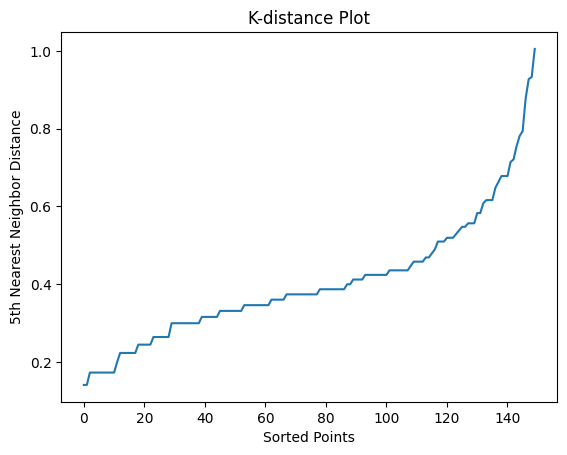

In [530]:
plt.plot([i for i in range(150)], kth_dis_sorted)
plt.ylabel("5th Nearest Neighbor Distance")
plt.xlabel("Sorted Points")
plt.title("K-distance Plot")
plt.savefig('kdistance_plot.png', dpi=300, bbox_inches='tight') 

In [523]:
dbscan_cluster =  DBSCAN(eps=0.55, min_samples=6).fit(df)

In [524]:
dbscan_labels = dbscan_cluster.labels_
less_0 = dbscan_labels[dbscan_labels < 0]
len(less_0)/ len(dbscan_labels)

0.09333333333333334

In [525]:
n_outliers = np.sum(dbscan_cluster.labels_< 0)

In [526]:
print("# outliers: ",n_outliers)
print(" # numbers: ",len(dbscan_cluster.labels_))

# outliers:  14
 # numbers:  150


In [527]:
colors = ['black', 'red', 'yellow', 'green', 'orange']

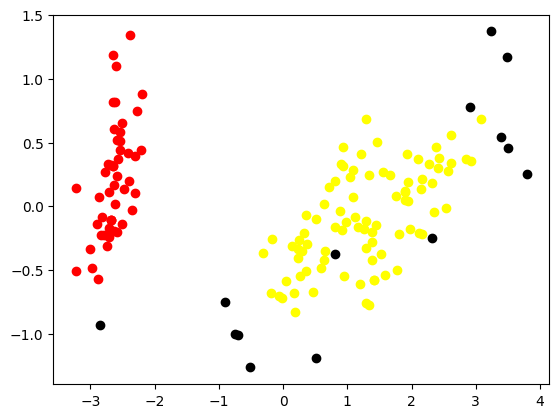

In [528]:
for points, p_class in zip(zip(data_pca[0],data_pca[1]), dbscan_cluster.labels_):
    x ,y =points
    plt.scatter(x,y, c=colors[p_class+1])